<a href="https://colab.research.google.com/github/andisutrakhusnulkarima/DeepLearning/blob/main/week3%20/%20CNN_No2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize




In [ ]:

# PyTorch: Preprocessing and DataLoader
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.SVHN(root='./data', split='train', download=True, transform=transform)
testset = torchvision.datasets.SVHN(root='./data', split='test', download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


In [ ]:
# Define CNN Model (PyTorch)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)  # Flatten the data
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2/2 ━━━━━━

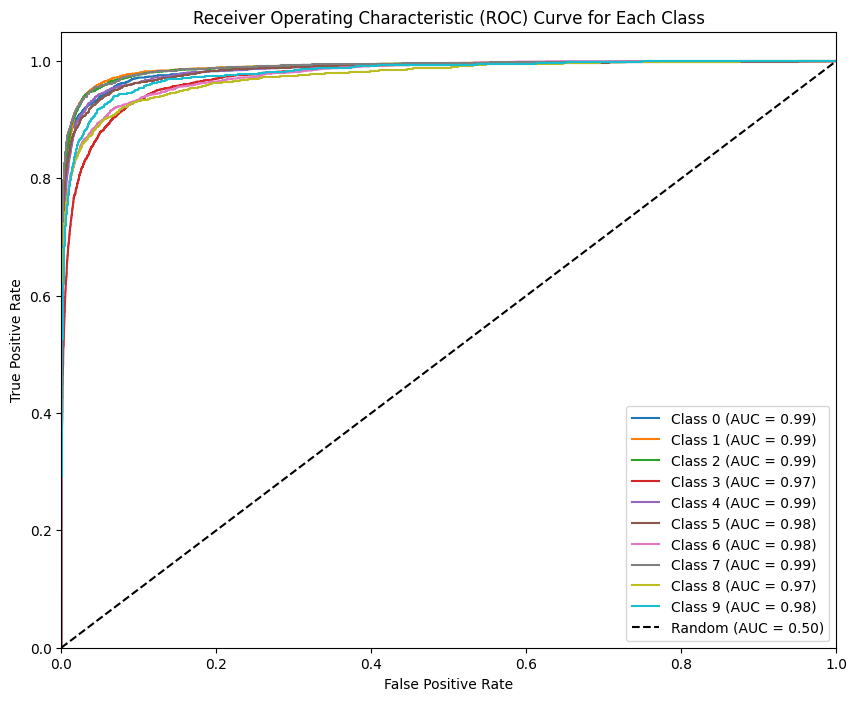

CNN (TensorFlow) - Accuracy: 0.8613245236631838
CNN (TensorFlow) - Precision: 0.8650364192809156
CNN (TensorFlow) - Recall: 0.8613245236631838
CNN (TensorFlow) - F1 Score: 0.861341891961576
CNN (TensorFlow) - AUC: 0.9841162833766203


In [ ]:

# Evaluate CNN Model (TensorFlow)
y_true = []
y_pred = []
y_probs = []  # Store the probabilities for AUC calculation

for image, label in test_data:
    predictions = cnn_model.predict(image)  # Predict probabilities for each class
    y_true.extend(label.numpy())  # True labels
    y_pred.extend(predictions.argmax(axis=1))  # Predicted class label
    y_probs.extend(predictions)  # Collecting probabilities for AUC calculation

# Metrics Evaluation
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# AUC calculation requires probabilities, not hard predictions
auc_value = roc_auc_score(y_true, y_probs, average='weighted', multi_class='ovr')

# Plotting ROC curve for each class (One-vs-Rest)
plt.figure(figsize=(10, 8))

for i in range(10):  # 10 classes in SVHN dataset
    fpr, tpr, _ = roc_curve(np.array(y_true) == i, np.array(y_probs)[:, i])  # Class i vs rest
    roc_auc = auc(fpr, tpr)  # Calculate AUC for the current class
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class')
plt.legend(loc='lower right')
plt.show()

# Print AUC
print(f'CNN (TensorFlow) - Accuracy: {accuracy}')
print(f'CNN (TensorFlow) - Precision: {precision}')
print(f'CNN (TensorFlow) - Recall: {recall}')
print(f'CNN (TensorFlow) - F1 Score: {f1}')
print(f'CNN (TensorFlow) - AUC: {auc_value}')

In [ ]:
# Define MLP Model (PyTorch)
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 512)  # Flatten input image
        self.fc2 = nn.Linear(512, 10)       # Output layer

    def forward(self, x):
        x = x.view(-1, 32*32*3)  # Flatten the data
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize MLP Model (PyTorch)
model_mlp = MLP().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_mlp.parameters(), lr=0.001)

# Train MLP Model (PyTorch)
def train_model(model, trainloader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.cuda(), labels.cuda()
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch {epoch+1}, Loss: {running_loss / len(trainloader)}')

train_model(model_mlp, trainloader, criterion, optimizer)

# Evaluate MLP Model (PyTorch)
def evaluate_model(model, testloader):
    model.eval()
    y_true = []
    y_pred = []
    y_probs = []  # Store the probabilities for AUC calculation
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.cuda(), labels.cuda()
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

            # Get probabilities for AUC calculation
            probs = torch.nn.functional.softmax(outputs, dim=1)
            y_probs.extend(probs.cpu().numpy())

    return y_true, y_pred, y_probs

# Get predictions and probabilities for ROC Curve
y_true, y_pred, y_probs = evaluate_model(model_mlp, testloader)

# Metrics Evaluation
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# AUC calculation requires probabilities, not hard predictions
y_true_bin = label_binarize(y_true, classes=[i for i in range(10)])  # Binarize labels for AUC calculation
auc_value = roc_auc_score(y_true_bin, y_probs, average='weighted', multi_class='ovr')

# Plotting ROC curve for each class (One-vs-Rest)
plt.figure(figsize=(10, 8))

for i in range(10):  # 10 classes in SVHN dataset
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], np.array(y_probs)[:, i])  # Class i vs rest
    roc_auc = auc(fpr, tpr)  # Calculate AUC for the current class
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class')
plt.legend(loc='lower right')
plt.show()

# Print AUC and other metrics
print(f'MLP (PyTorch) - Accuracy: {accuracy}')
print(f'MLP (PyTorch) - Precision: {precision}')
print(f'MLP (PyTorch) - Recall: {recall}')
print(f'MLP (PyTorch) - F1 Score: {f1}')
print(f'MLP (PyTorch) - AUC: {auc_value}')

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

Epoch 1, Loss: 1.220600931873488
Epoch 2, Loss: 0.8398859615148936
Epoch 3, Loss: 0.7276097510839654
Epoch 4, Loss: 0.673146512674973
Epoch 5, Loss: 0.6384342163671052
Epoch 6, Loss: 0.6074055529447622
Epoch 7, Loss: 0.5812664623083507
Epoch 8, Loss: 0.5637802239849057
Epoch 9, Loss: 0.5513593690884686
Epoch 10, Loss: 0.5290221817758927


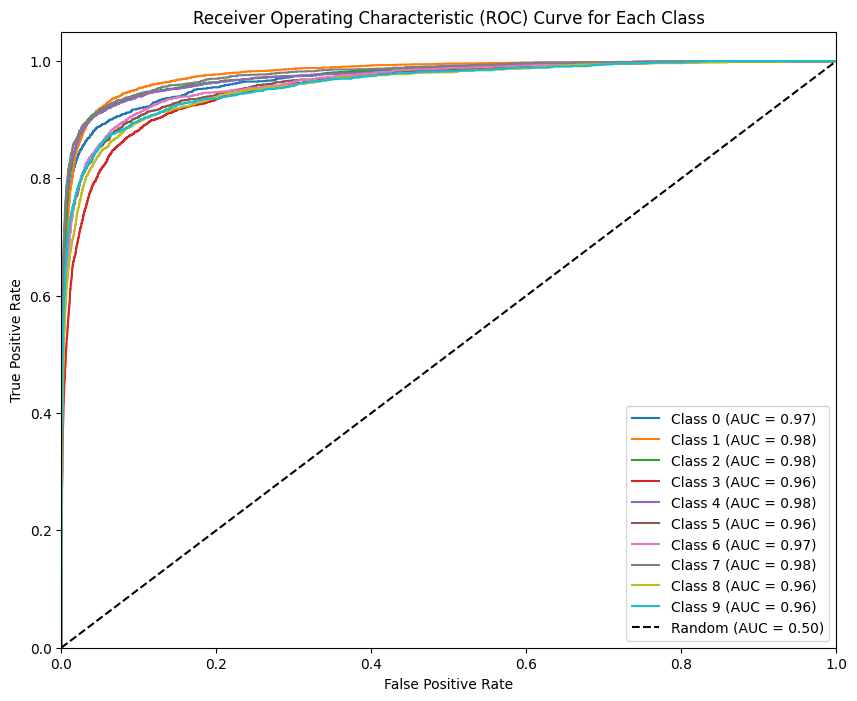

MLP (PyTorch) - Accuracy: 0.8097341733251383
MLP (PyTorch) - Precision: 0.8181249299261992
MLP (PyTorch) - Recall: 0.8097341733251383
MLP (PyTorch) - F1 Score: 0.8113464107496561
MLP (PyTorch) - AUC: 0.9702608999570792


In [ ]:

# Define MLP Model (PyTorch)
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 512)  # Flatten input image
        self.fc2 = nn.Linear(512, 10)       # Output layer

    def forward(self, x):
        x = x.view(-1, 32*32*3)  # Flatten the data
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize MLP Model (PyTorch)
model_mlp = MLP()  # Tanpa .cuda() karena kita menggunakan CPU
model_mlp = model_mlp.cpu()  # Pastikan model ada di CPU
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_mlp.parameters(), lr=0.001)

# Train MLP Model (PyTorch)
def train_model(model, trainloader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.cpu(), labels.cpu()  # Pastikan input dan label di CPU
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch {epoch+1}, Loss: {running_loss / len(trainloader)}')

train_model(model_mlp, trainloader, criterion, optimizer)

# Evaluate MLP Model (PyTorch)
def evaluate_model(model, testloader):
    model.eval()
    y_true = []
    y_pred = []
    y_probs = []  # Store the probabilities for AUC calculation
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.cpu(), labels.cpu()  # Pastikan input dan label di CPU
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.numpy())
            y_pred.extend(predicted.numpy())

            # Get probabilities for AUC calculation
            probs = torch.nn.functional.softmax(outputs, dim=1)
            y_probs.extend(probs.numpy())

    return y_true, y_pred, y_probs

# Get predictions and probabilities for ROC Curve
y_true, y_pred, y_probs = evaluate_model(model_mlp, testloader)

# Metrics Evaluation
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# AUC calculation requires probabilities, not hard predictions
y_true_bin = label_binarize(y_true, classes=[i for i in range(10)])  # Binarize labels for AUC calculation
auc_value = roc_auc_score(y_true_bin, y_probs, average='weighted', multi_class='ovr')

# Plotting ROC curve for each class (One-vs-Rest)
plt.figure(figsize=(10, 8))

for i in range(10):  # 10 classes in SVHN dataset
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], np.array(y_probs)[:, i])  # Class i vs rest
    roc_auc = auc(fpr, tpr)  # Calculate AUC for the current class
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Each Class')
plt.legend(loc='lower right')
plt.show()

# Print AUC and other metrics
print(f'MLP (PyTorch) - Accuracy: {accuracy}')
print(f'MLP (PyTorch) - Precision: {precision}')
print(f'MLP (PyTorch) - Recall: {recall}')
print(f'MLP (PyTorch) - F1 Score: {f1}')
print(f'MLP (PyTorch) - AUC: {auc_value}')
